In [1]:
import sys
sys.path.append("utils")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from utils import normalize

# Load Data and Pre-Processing

In [2]:
### Load Data (Expression Matrix) ###

df_feature = pd.read_table('../data/CellCycleStage/esc2i_tpm.txt')



### Pre-processing ###

df_feature = df_feature.transpose()
df_feature = df_feature.iloc[1:,:]
df_feature = df_feature.astype(np.float32)
df_feature_min_max_scaling = normalize(df_feature, 'min_max_scaling')
df_feature_whitening = normalize(df_feature, 'whitening')
df_feature_log = normalize(df_feature, 'log')

# Fitting and Transform by PCA & t-SNE

In [3]:
X = df_feature.values
X_embedded_PCA = PCA(n_components=2).fit_transform(X)
X_embedded_TSNE = TSNE(n_components=2, init='random').fit_transform(X)

print('X dimension: {}'.format(X.shape))
print('reduced X dimension: {}'.format(X_embedded_PCA.shape))

X = df_feature_min_max_scaling.values
X_embedded_PCA_min_max_scaling = PCA(n_components=2).fit_transform(X)
X_embedded_TSNE_min_max_scaling = TSNE(n_components=2, init='random').fit_transform(X)

X = df_feature_whitening.values
X_embedded_PCA_whitening = PCA(n_components=2).fit_transform(X)
X_embedded_TSNE_whitening = TSNE(n_components=2, init='random').fit_transform(X)

X = df_feature_log.values
X_embedded_PCA_log = PCA(n_components=2).fit_transform(X)
X_embedded_TSNE_log = TSNE(n_components=2, init='random').fit_transform(X)

X dimension: (485, 49193)
reduced X dimension: (485, 2)


# Visualization

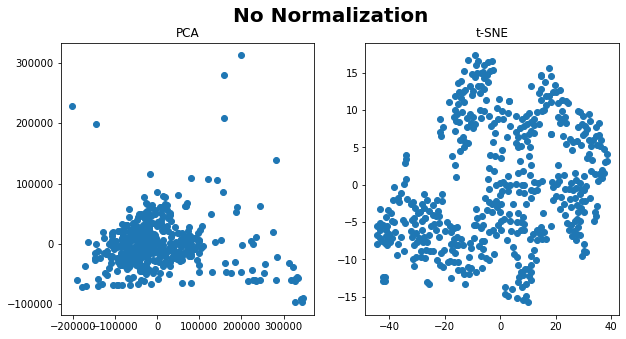

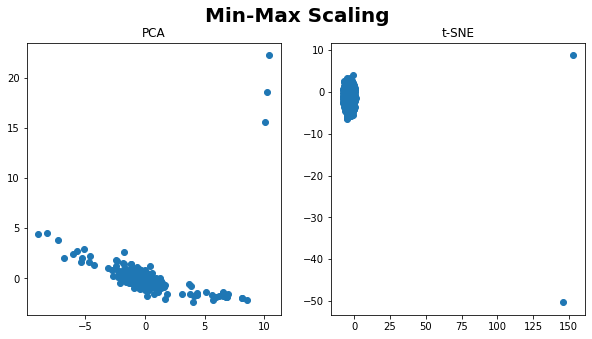

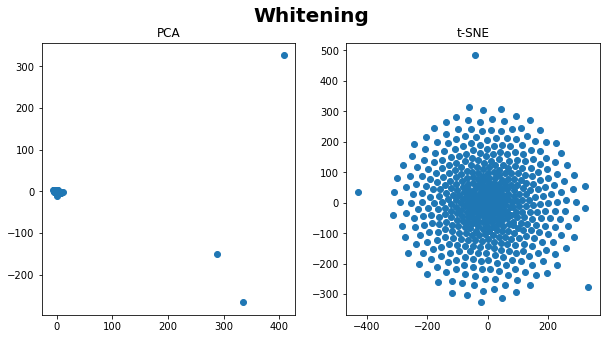

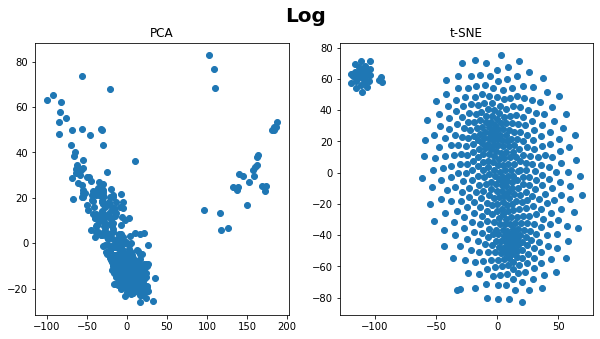

In [4]:
figsize = (10, 5)

fig = plt.figure(figsize=figsize)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(X_embedded_PCA[:,0], X_embedded_PCA[:,1], 'o')
ax1.set_title("PCA")
ax2.plot(X_embedded_TSNE[:,0], X_embedded_TSNE[:,1], 'o')
ax2.set_title("t-SNE") 

fig.suptitle('No Normalization', fontweight ="bold", fontsize=20)
plt.show()



fig = plt.figure(figsize=figsize)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(X_embedded_PCA_min_max_scaling[:,0], X_embedded_PCA_min_max_scaling[:,1], 'o')
ax1.set_title("PCA")
ax2.plot(X_embedded_TSNE_min_max_scaling[:,0], X_embedded_TSNE_min_max_scaling[:,1], 'o')
ax2.set_title("t-SNE")

fig.suptitle('Min-Max Scaling', fontweight ="bold", fontsize=20)
plt.show()



fig = plt.figure(figsize=figsize)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(X_embedded_PCA_whitening[:,0], X_embedded_PCA_whitening[:,1], 'o')
ax1.set_title("PCA")
ax2.plot(X_embedded_TSNE_whitening[:,0], X_embedded_TSNE_whitening[:,1], 'o')
ax2.set_title("t-SNE")

fig.suptitle('Whitening', fontweight ="bold", fontsize=20)
plt.show()



fig = plt.figure(figsize=figsize)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(X_embedded_PCA_log[:,0], X_embedded_PCA_log[:,1], 'o')
ax1.set_title("PCA")
ax2.plot(X_embedded_TSNE_log[:,0], X_embedded_TSNE_log[:,1], 'o')
ax2.set_title("t-SNE")

fig.suptitle('Log', fontweight ="bold", fontsize=20)
plt.show()